<a href="https://colab.research.google.com/github/JungYeonHee/MachineLearning/blob/master/4%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제 1 (4주차에 출제)

데이터
- [ramen_ratings.csv](https://drive.google.com/file/d/1VyvLpQCu4jdpXbYnT_6KVVgflPTA6VZ-/view?usp=sharing)

- 해당 데이터를 본인의 구글 드라이브에 복사후 실시

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install -U seaborn
!pip install sklearn
import numpy as np
import pandas as pd

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)


본인의 구글 드라이브에 업로드 후 진행

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


상황에 맞게 경로를 수정할 것

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/ramen-ratings.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


``Stars`` 컬럼 특성 파악

In [ ]:
df.Stars.value_counts()

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
1           26
0           26
2.25        21
0.5         14
0.25        11
1.25        10
5.0         10
3.50         9
5.00         7
4.00         6
4.3          4
Unrated      3
3.8          3
4.50         3
4.0          3
1.1          2
2.3          2
4.125        2
2.8          2
3.1          2
3.0          2
2.9          2
3.4          1
3.7          1
3.3          1
0.1          1
0.75         1
3.65         1
1.8          1
0.9          1
2.125        1
3.2          1
2.85         1
3.125        1
2.1          1
3.00         1
3.6          1
Name: Stars, dtype: int64

## Q1: Stars 열에 'Unrated' 값을 제거

In [ ]:
df['Stars'] = df['Stars'].str.replace("Unrated",'0')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


## Q2: Stars 열을 float32 타입으로 변경

In [ ]:
df['Stars'] = df['Stars'].astype("float32")
#df['Stars'] = pd.to_numeric(df['Stars'], downcast='float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2580 non-null   float32
 6   Top Ten   41 non-null     object 
dtypes: float32(1), int64(1), object(5)
memory usage: 131.1+ KB


## Q3: ``Review #``을 인덱스로 세팅하고 정렬

In [ ]:
df = df.set_index(["Review #"])
df= df.sort_index()
#df = df.sort_values(by=["Review #"])

In [ ]:
df.head()

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
1,Westbrae,Miso Ramen,Pack,USA,0.5,NaN
2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN
3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN
4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN
5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN


## Q4: groupby 를 이용하여 ``Brand`` 별 평균 평점 구하여, 내림차순으로 정렬

In [ ]:
df.groupby(['Brand']).mean().sort_values(by='Stars', ascending = False)

,Stars
Brand,
Higashi,5.0
Foodmon,5.0
Tao Kae Noi,5.0
Takamori,5.0
MyOri,5.0
...,...
Dr. McDougall's,0.0
Tiger,0.0
Kim Ve Wong,0.0


In [ ]:
import seaborn as sns

브랜드가 농심 인 것으로 제한

In [ ]:
nongshim_df = df[df.Brand=='Nongshim']
nongshim_df = nongshim_df[nongshim_df['Country'] != 'United States']

In [ ]:
nongshim_df.Country.value_counts()

South Korea    57
USA            35
China           5
Name: Country, dtype: int64

## Q5: Country를 열로하여, Style 마다 분포를 중첩하여 그려보자



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

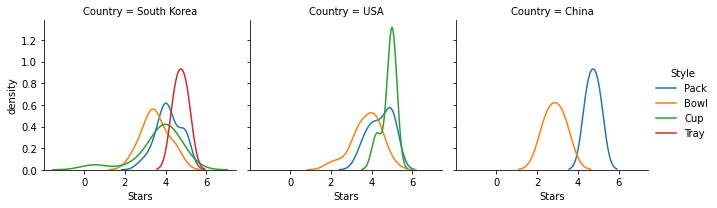

In [ ]:
#sns.displot(df = nongshim_df , col="Country" , kind="kde", hue ="style")
g = sns.FacetGrid(data=nongshim_df, col='Country', col_order=['South Korea', 'USA','China'], hue="Style")
g = g.map(sns.distplot, "Stars", hist=False, kde  =  True)
g.add_legend()
g.set_ylabels("density")

## Q6: Style 마다 Stars 의 통계 정보를 바 그래프로 나타내되, Country를 hue로 설정하여 대비를 나타내게 하자.

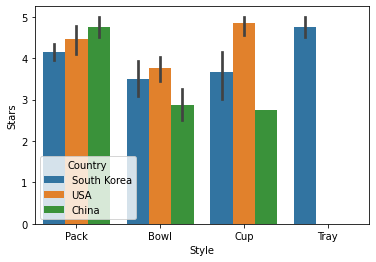

In [ ]:
sns.barplot(data=nongshim_df, x='Style', y='Stars', hue="Country")

## Q7: 원본 데이터로부터 어떤 인사이트를 발굴할 수 있는지 고민하고 추가해보자.

원본 데이터의 출처는 [캐글의 Ramen Ratings](https://www.kaggle.com/residentmario/ramen-ratings)이니 이곳을 참고해보자.